In [2]:
from set_math import *

sympy imported
pandas imported
numpy imported
scipy imported
statsmodels imported
statsmodels.formula imported
statasmodels.stats.api imported


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from set_visualization import *

matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary


# load and merge data

In [4]:
train = pd.read_csv("../../data/basic/train.csv")
key = pd.read_csv("../../data/basic/key.csv")
weather1 = pd.read_csv("../../data/weather_v8_with_holiday.csv", index_col = 0)

In [5]:
df = pd.merge(train, key)

In [6]:
df1 = pd.merge(df, weather1)
df1 = pd.DataFrame(data=df1, columns=['date', 'units','store_nbr','item_nbr', 'station_nbr', 
                                      'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 
                                      'sunrise', 'sunset', 'snowfall', 'preciptotal',
                                      'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 
                                      'codesum', 'codesum_YN', 'dayofweek', 'is_holiday'])
print(df1.shape)
print(df1.columns)
df1.head()

(4617600, 26)
Index(['date', 'units', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'codesum', 'codesum_YN',
       'dayofweek', 'is_holiday'],
      dtype='object')


,date,units,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,codesum,codesum_YN,dayofweek,is_holiday
0,2012-01-01,0,1,1,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
1,2012-01-01,0,1,2,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
2,2012-01-01,0,1,3,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
3,2012-01-01,0,1,4,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
4,2012-01-01,0,1,5,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday


# 단 한번도 팔리지 않은 item_nbr 가 있는지 확인.

In [7]:
df_test = df1

In [8]:
table = pd.pivot_table(df_test, values = ['units'], index=['store_nbr'], columns=['item_nbr'], aggfunc=np.sum)

In [9]:
table = table['units']

In [10]:
sold_item = []
for j in range(1, 45+1):
    for i in range(1, 111+1):
        if table[i].loc[j] != 0:
            sold_item.append(i)

print(sold_item)

[9, 28, 40, 47, 51, 89, 93, 99, 5, 11, 44, 85, 93, 2, 5, 45, 93, 102, 109, 9, 27, 90, 93, 96, 97, 101, 16, 20, 32, 37, 93, 105, 9, 14, 45, 107, 5, 7, 23, 93, 95, 5, 23, 59, 84, 93, 100, 5, 10, 42, 45, 93, 105, 5, 21, 37, 86, 93, 9, 61, 68, 86, 87, 110, 16, 37, 79, 86, 93, 5, 36, 46, 93, 104, 9, 15, 25, 33, 50, 70, 88, 93, 5, 15, 17, 45, 49, 61, 86, 93, 16, 25, 39, 50, 64, 77, 85, 93, 9, 37, 48, 71, 5, 37, 57, 72, 15, 16, 39, 69, 75, 83, 88, 93, 5, 18, 41, 74, 93, 106, 5, 44, 91, 109, 9, 54, 68, 78, 93, 104, 5, 29, 45, 56, 6, 43, 60, 76, 97, 9, 12, 45, 50, 81, 84, 93, 2, 5, 45, 9, 21, 68, 80, 93, 2, 5, 35, 45, 8, 41, 45, 56, 13, 16, 44, 49, 51, 65, 9, 45, 67, 93, 98, 104, 9, 19, 45, 51, 58, 86, 93, 9, 44, 85, 92, 93, 9, 31, 45, 52, 84, 93, 16, 24, 49, 50, 63, 66, 93, 105, 1, 9, 30, 44, 5, 15, 38, 45, 53, 104, 105, 9, 45, 52, 86, 93, 98, 9, 36, 103, 111, 5, 15, 45, 51, 55, 93, 106, 16, 61, 68, 86, 93, 108, 5, 45, 82, 3, 16, 37, 73, 93, 105, 5, 62, 68, 93, 94, 105, 4, 9, 22, 26, 34, 50]


In [11]:
not_sold=[]
for num in range(1, 111+1):
    if num not in sold_item == True:
        not_sold.append(num)
        
print(not_sold)

[]


### 단 한번도 팔리지 않은 아이템은 없다

# units이 0이면 제외

In [12]:
df_test = df_test[df_test["units"] > 0].reset_index(drop=True)
print(df_test.shape)
df_test.head()

(118696, 26)


,date,units,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,codesum,codesum_YN,dayofweek,is_holiday
0,2012-01-01,29,1,9,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
1,2012-01-01,2,1,28,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
2,2012-01-01,1,1,51,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
3,2012-01-02,60,1,9,1,50.0,31.0,41.0,0.0,26.0,...,0.01,29.44,29.62,9.8,24.0,10.3,moderate,0,Mon,holiday_work
4,2012-01-02,5,1,28,1,50.0,31.0,41.0,0.0,26.0,...,0.01,29.44,29.62,9.8,24.0,10.3,moderate,0,Mon,holiday_work


In [13]:
df_test = df_test[df_test["units"] < 1000 ].reset_index(drop=True)
print(df_test.shape)
df_test.head()

(118694, 26)


,date,units,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,codesum,codesum_YN,dayofweek,is_holiday
0,2012-01-01,29,1,9,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
1,2012-01-01,2,1,28,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
2,2012-01-01,1,1,51,1,52.0,31.0,42.0,0.0,36.0,...,0.05,29.78,29.92,3.6,20.0,4.6,RA FZFG BR,1,Sun,holiday
3,2012-01-02,60,1,9,1,50.0,31.0,41.0,0.0,26.0,...,0.01,29.44,29.62,9.8,24.0,10.3,moderate,0,Mon,holiday_work
4,2012-01-02,5,1,28,1,50.0,31.0,41.0,0.0,26.0,...,0.01,29.44,29.62,9.8,24.0,10.3,moderate,0,Mon,holiday_work


### 카테고리 독립변수 one-hot-encoding

In [14]:
def is_holiday(holiday):
    if holiday == 'holiday':
        return 1
    elif holiday == 'holiday_work':
        return 1
    elif holiday == "workday":
        return 0

In [15]:
df_test['is_holiday'] = df_test['is_holiday'].apply(is_holiday)

In [16]:
df_test[['codesum_YN', 'is_holiday']].head()

,codesum_YN,is_holiday
0,1,1
1,1,1
2,1,1
3,0,1
4,0,1


In [17]:
df_test.to_csv('train2.csv')

In [18]:
df_test = pd.read_csv('train2.csv', index_col = 0)

In [19]:
df_test

,date,units,store_nbr,item_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,codesum,codesum_YN,dayofweek,is_holiday
0,2012-01-01,29,1,9,1,52.000000,31.000000,42.000000,0.000000,36.0,...,0.050000,29.780000,29.92,3.6,20.0,4.600000,RA FZFG BR,1,Sun,1
1,2012-01-01,2,1,28,1,52.000000,31.000000,42.000000,0.000000,36.0,...,0.050000,29.780000,29.92,3.6,20.0,4.600000,RA FZFG BR,1,Sun,1
2,2012-01-01,1,1,51,1,52.000000,31.000000,42.000000,0.000000,36.0,...,0.050000,29.780000,29.92,3.6,20.0,4.600000,RA FZFG BR,1,Sun,1
3,2012-01-02,60,1,9,1,50.000000,31.000000,41.000000,0.000000,26.0,...,0.010000,29.440000,29.62,9.8,24.0,10.300000,moderate,0,Mon,1
4,2012-01-02,5,1,28,1,50.000000,31.000000,41.000000,0.000000,26.0,...,0.010000,29.440000,29.62,9.8,24.0,10.300000,moderate,0,Mon,1
5,2012-01-02,1,1,51,1,50.000000,31.000000,41.000000,0.000000,26.0,...,0.010000,29.440000,29.62,9.8,24.0,10.300000,moderate,0,Mon,1
6,2012-01-03,15,1,9,1,32.000000,11.000000,22.000000,0.000000,4.0,...,0.000000,29.670000,29.87,10.8,31.0,11.600000,moderate,0,Tue,0
7,2012-01-03,9,1,28,1,32.000000,11.000000,22.000000,0.000000,4.0,...,0.000000,29.670000,29.87,10.8,31.0,11.600000,moderate,0,Tue,0
8,2012-01-04,20,1,9,1,28.000000,9.000000,19.000000,0.000000,-1.0,...,0.000000,29.860000,30.03,6.3,27.0,8.300000,moderate,0,Wed,0
9,2012-01-04,3,1,28,1,28.000000,9.000000,19.000000,0.000000,-1.0,...,0.000000,29.860000,30.03,6.3,27.0,8.300000,moderate,0,Wed,0


# 실수형 변수 분포

In [20]:
df_test.columns

Index(['date', 'units', 'store_nbr', 'item_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed', 'codesum', 'codesum_YN',
       'dayofweek', 'is_holiday'],
      dtype='object')

In [21]:
dfX1 = df_test[['units', 'tmax', 'tmin',
               'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise','sunset',
               'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
               'resultspeed', 'resultdir', 'avgspeed']]
dfy = df_test['units']

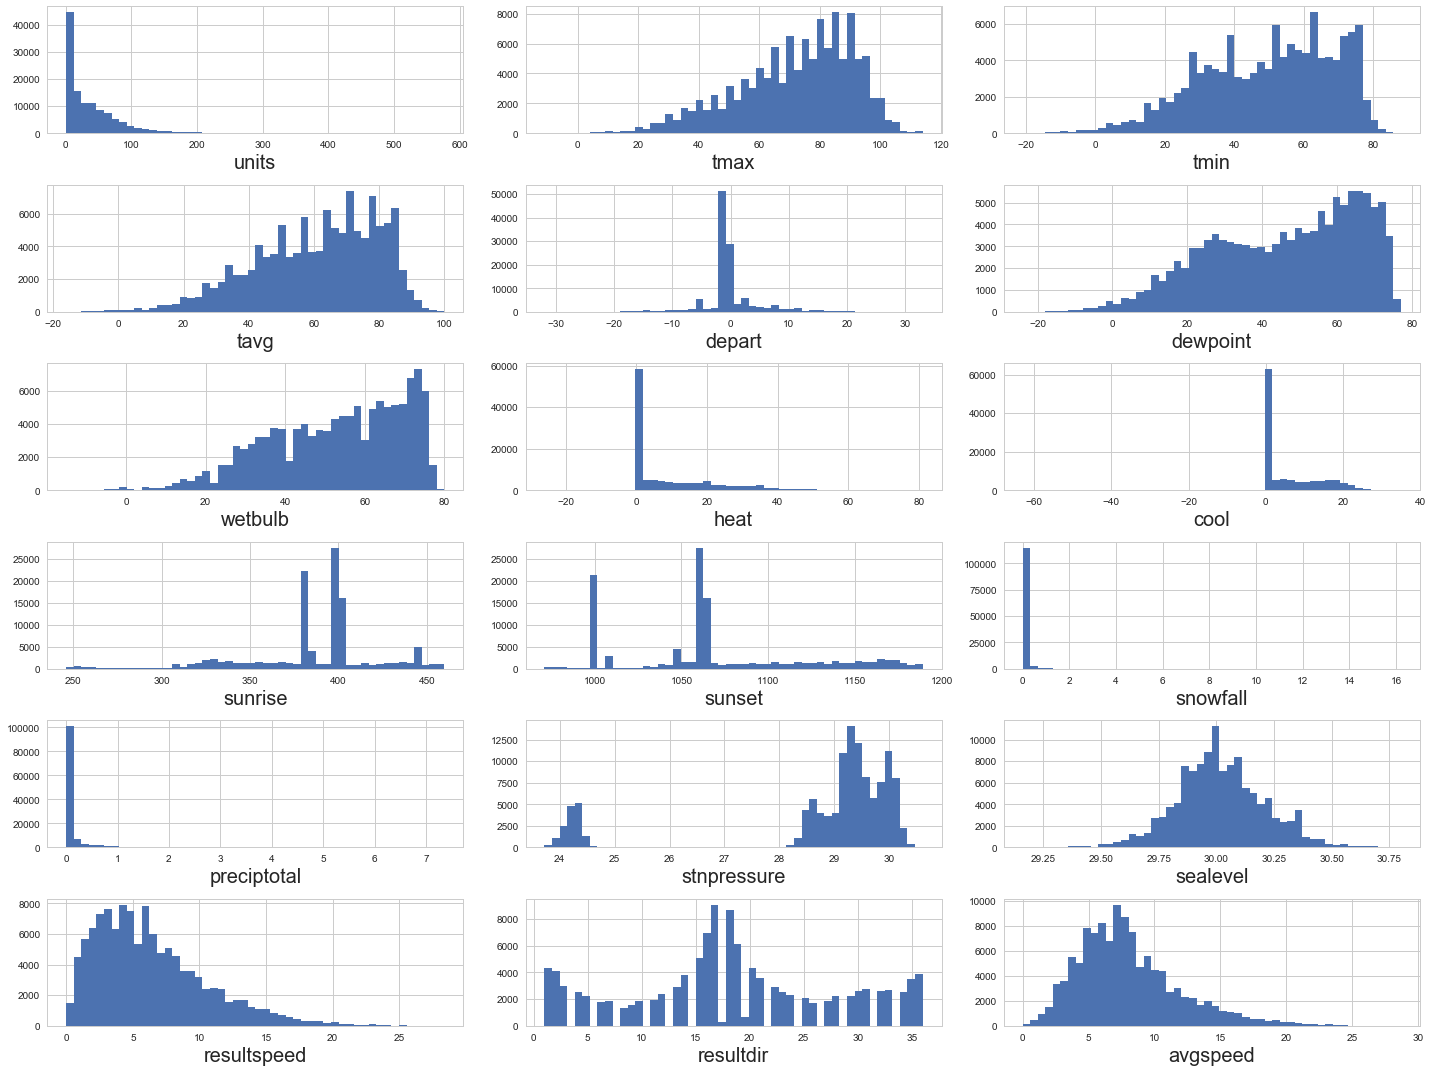

In [92]:
fig = plt.figure(figsize=(20, 15))
for i in range(0,18):
    plt.subplot(6, 3, i+1)
    plt.hist(dfX1[dfX1.columns[i]], bins=50)
    plt.xlabel(dfX1.columns[i], fontsize = 20)
plt.tight_layout()

# Trial 0 : units=0을 제외한 모든 데이터 & 모든 독립변수

- 실수형 : 모든 실수형 피쳐
- 카테고리형 : item_nbr, store_nbr

In [70]:
model_1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + depart + dewpoint + wetbulb + heat + cool + sunrise + sunset + codesum_YN + snowfall + preciptotal + stnpressure + sealevel + resultspeed + resultdir + avgspeed + C(item_nbr) + C(store_nbr) + codesum_YN + is_holiday + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1584.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:02:15   Log-Likelihood:            -5.4865e+05
No. Observations:              118694   AIC:                         1.098e+06
Df Residuals:                  118520   BIC:                         1.099e+06
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(item_nbr)[1]       -37.4206     18

# 1. Correlation & VIF

### 실수형 독립변수 corrleation

In [71]:
dfX1.corr()

In [ ]:
dfX1_corr['units'] > 0.05

# heat, sunset, resultspeed, avgspeed

In [ ]:
dfX1_corr['units'] < -0.05

#tmin, dewpoint, wetbulb, stnpressure 

##### `units와 그나마 높은 상관관계를 보이는 resultspeed, avgspeed, stnpressure`

## 1-1 : Correlation으로 거른 실수형 + 카테고리형 독립변수

In [ ]:
df_test.columns

In [ ]:
features = ['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'codesum', 'codesum_YN', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'dayofweek', 'is_holiday']
features = " ".join(features)
features = features.replace(" ", " + ")
features

### 1-1-1

- 실수형 : resultspeed, avgspeed, stnpressure
- 카테고리 : item_nbr, store_nbr

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultspeed + avgspeed + stnpressure  + C(item_nbr) + C(store_nbr)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

### 1-1-2

- 실수형 : resultspeed, avgspeed, stnpressure
- 카테고리 : item_nbr, store_nbr, codesum_YN

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultspeed + avgspeed + stnpressure + codesum_YN + C(item_nbr) + C(store_nbr)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

### 1-1-3

- 실수형 : resultspeed, avgspeed, stnpressure
- 카테고리 : item_nbr, store_nbr, is_holiday

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultspeed + avgspeed + stnpressure + is_holiday + C(item_nbr) + C(store_nbr)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

### 1-1-4

- 실수형 : resultspeed, avgspeed, stnpressure
- 카테고리 : item_nbr, store_nbr, is_holiday, codesum_YN

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultspeed + avgspeed + stnpressure + is_holiday+ codesum_YN + C(item_nbr) + C(store_nbr)', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

### 1-2 : VIF 로 거른 실수형 + 카테고리형 독립변수


#### VIF를 통한 실수형 독립변수 정리

In [73]:
df_for_vif = df_test[['tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed']]

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns

In [75]:
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,35417.664877,tavg
1,11903.939249,tmax
2,6175.128412,tmin
3,2399.401944,sealevel
4,1334.219650,wetbulb
5,688.309578,sunset
6,411.131491,stnpressure
7,224.405604,dewpoint
8,167.841642,sunrise
9,53.511542,heat


In [76]:
del df_for_vif['tavg']

In [77]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,2370.950698,sealevel
1,1334.143379,wetbulb
2,688.248986,sunset
3,442.560469,tmax
4,411.129519,stnpressure
5,309.921513,tmin
6,224.396435,dewpoint
7,167.825203,sunrise
8,52.019191,heat
9,32.638538,avgspeed


In [78]:
del df_for_vif['sealevel']

In [79]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,1326.117191,wetbulb
1,383.767509,sunset
2,362.011114,tmax
3,326.688336,stnpressure
4,290.162156,tmin
5,220.447804,dewpoint
6,111.254584,sunrise
7,37.257139,heat
8,32.617869,avgspeed
9,20.081486,resultspeed


In [80]:
del df_for_vif['wetbulb']

In [81]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,382.609397,sunset
1,313.868657,stnpressure
2,238.474675,tmax
3,207.221806,tmin
4,111.251082,sunrise
5,67.810484,dewpoint
6,36.955393,heat
7,32.401422,avgspeed
8,19.948291,resultspeed
9,11.569139,cool


In [82]:
del df_for_vif['sunset']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,277.569993,stnpressure
1,177.160932,tmin
2,152.306715,tmax
3,106.976911,sunrise
4,67.721453,dewpoint
5,30.670584,avgspeed
6,23.058293,heat
7,19.349301,resultspeed
8,8.710128,cool
9,4.976617,resultdir


In [83]:
del df_for_vif['stnpressure']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,156.605055,tmin
1,108.370433,tmax
2,100.634191,sunrise
3,60.361261,dewpoint
4,28.150338,avgspeed
5,17.483125,resultspeed
6,10.031113,heat
7,5.548678,cool
8,4.940169,resultdir
9,1.333389,preciptotal


In [84]:
del df_for_vif['tmin']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,96.350032,tmax
1,92.753370,sunrise
2,31.879334,dewpoint
3,27.970724,avgspeed
4,17.397120,resultspeed
5,8.343727,heat
6,4.933549,resultdir
7,4.285136,cool
8,1.331286,preciptotal
9,1.190138,snowfall


In [86]:
del df_for_vif['tmax']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,24.136153,avgspeed
1,16.153822,resultspeed
2,7.211263,dewpoint
3,4.455338,resultdir
4,2.714169,cool
5,2.257908,heat
6,1.283833,preciptotal
7,1.185154,snowfall
8,1.078534,depart


In [85]:
del df_for_vif['sunrise']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,39.726883,tmax
1,30.087721,dewpoint
2,27.860002,avgspeed
3,17.394662,resultspeed
4,4.927488,resultdir
5,2.749604,cool
6,2.293585,heat
7,1.331259,preciptotal
8,1.188668,snowfall
9,1.088079,depart


In [87]:
del df_for_vif['avgspeed']
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_for_vif.values, i) for i in range(df_for_vif.shape[1])]
vif["features"] = df_for_vif.columns
vif.sort_values(by=['VIF Factor'], ascending=False).reset_index(drop=True)

,VIF Factor,features
0,6.350035,dewpoint
1,4.272647,resultdir
2,3.249983,resultspeed
3,2.685673,cool
4,2.121170,heat
5,1.280202,preciptotal
6,1.184934,snowfall
7,1.073029,depart


dewpoint, resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart

### 1-2-1

- 실수형 : dewpoint, resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart
- 카테고리 : item_nbr, store_nbr

In [ ]:
model_1 = sm.OLS.from_formula('units ~ dewpoint + resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

### 1-2-2

- 실수형 : resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart
- 카테고리 : item_nbr, store_nbr, is_holiday

In [88]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1686.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:22:39   Log-Likelihood:            -5.4880e+05
No. Observations:              118694   AIC:                         1.098e+06
Df Residuals:                  118531   BIC:                         1.100e+06
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(item_nbr)[1]        12.7665      1

### 2-3

- 실수형 : resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart
- 카테고리 : item_nbr, store_nbr, codesum_YN

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + codesum_YN + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

### 2-4

- 실수형 : resultdir, resultspeed, cool, heat, preciptotal, snowfall, depart
- 카테고리 : item_nbr, store_nbr, codesum_YN, is_holiday

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + codesum_YN + is_holiday + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

# 최종 결정

### 1-2-2

- 실수형 : resultspeed, cool, heat, preciptotal, depart (p-value가 크기 때문에 제외 : resultdir, snowfall)
- 카테고리 : item_nbr, store_nbr, is_holiday

In [89]:
model_1 = sm.OLS.from_formula('units ~ resultspeed + cool + heat + preciptotal + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1707.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:23:06   Log-Likelihood:            -5.4880e+05
No. Observations:              118694   AIC:                         1.098e+06
Df Residuals:                  118533   BIC:                         1.099e+06
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(item_nbr)[1]        13.0678      1

# Scaling 적용

In [ ]:
# model_s = sm.OLS.from_formula('scale(units) ~ scale(resultspeed) + scale(cool) + scale(heat) + scale(preciptotal) + scale(depart) + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
# result_s = model_s.fit()
# print(result_s.summary())

# 치우친 분포를 보이는 변수에 한해 변수 변환

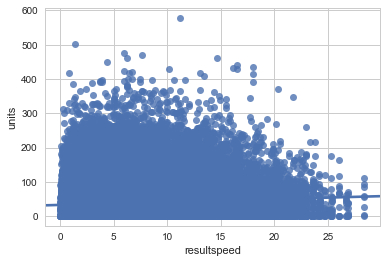

In [29]:
sns.regplot(x="resultspeed", y="units", data=df_test)
plt.show()

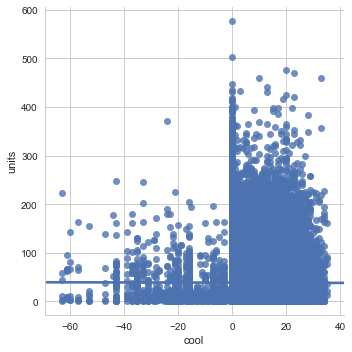

In [34]:
sns.lmplot(x="cool", y="units", data=df_test)
plt.show()

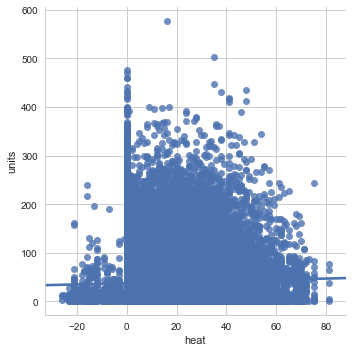

In [33]:
sns.lmplot(x="heat", y="units", data=df_test)
plt.show()

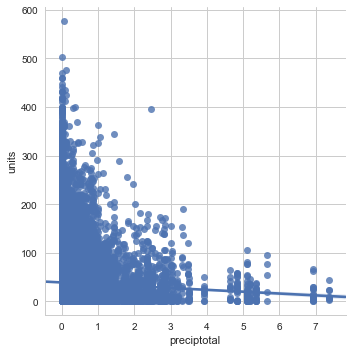

In [32]:
sns.lmplot(x="preciptotal", y="units", data=df_test)
plt.show()

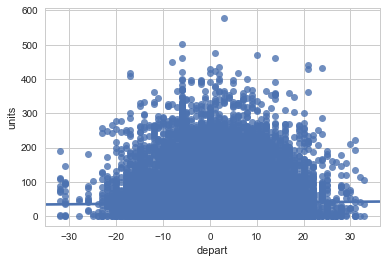

In [35]:
sns.regplot(x="depart", y="units", data=df_test)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


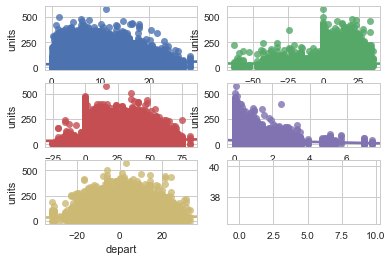

In [51]:

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) =plt.subplots(nrows=3,ncols=2)
plt.figure(1, figsize=(12,2))
sns.regplot(x="resultspeed", y="units", data=df_test, ax=ax1)
sns.regplot(x="cool", y="units", data=df_test, ax=ax2)
sns.regplot(x="heat", y="units", data=df_test, ax=ax3)
sns.regplot(x="preciptotal", y="units", data=df_test, ax=ax4)
sns.regplot(x="depart", y="units", data=df_test, ax=ax5)
fig.show()

In [52]:
model_s = sm.OLS.from_formula('units ~ np.log(resultspeed) + np.log(cool) + np.log(heat) + np.log(preciptotal) + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_s = model_s.fit()
print(result_s.summary())

<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
<string>:1: RuntimeWarning: invalid value encountered in log
<string>:1: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/linalg/linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)


LinAlgError: SVD did not converge

In [ ]:
sp.stats.probplot(result_1.resid, plot=plt)
plt.show()

In [ ]:
test = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

# 차수 결정 

$y = RS + RS^2 + Co + He + Pr + Dp + \text{item_nbr} + \text{store_nbr} + \text{is_holiday}$

In [ ]:
model_d = sm.OLS.from_formula('scale(units) ~ scale(resultspeed) + scale(I(resultspeed**2)) + scale(cool) + scale(heat) + scale(preciptotal) + scale(depart) + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_d = model_s.fit()
print(result_d.summary())

$y = RS + RS^2 + Co + Co^2 + He + Pr + Dp + \text{item_nbr} + \text{store_nbr} + \text{is_holiday}$

In [ ]:
model_d = sm.OLS.from_formula('scale(units) ~ scale(resultspeed) + scale(I(resultspeed**2)) + scale(cool) + scale(I(cool**2)) + scale(heat) + scale(preciptotal) + scale(depart) + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_d = model_s.fit()
print(result_d.summary())

$y = RS + RS^2 + Co + Co^2 + He + He^2 + Pr + Dp + \text{item_nbr} + \text{store_nbr} + \text{is_holiday}$

In [ ]:
model_d = sm.OLS.from_formula('scale(units) ~ scale(resultspeed) + scale(I(resultspeed**2)) + scale(cool) + scale(I(cool**2)) + scale(heat) + scale(I(heat**2)) + scale(preciptotal) + scale(depart) + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_d = model_s.fit()
print(result_d.summary())

 $y = RS + RS^2 + Co + Co^2 + He + He^2 + Pr + Pr^2 + Dp + \text{item_nbr} + \text{store_nbr} + \text{is_holiday}$

In [ ]:
model_d = sm.OLS.from_formula('scale(units) ~ scale(resultspeed) + scale(I(resultspeed**2)) + scale(cool) + scale(I(cool**2)) + scale(heat) + scale(I(heat**2)) + scale(preciptotal) + scale(I(preciptotal**2)) + scale(depart) + C(item_nbr) + C(store_nbr) + is_holiday + 0', data=df_test)
result_d = model_s.fit()
print(result_d.summary())

# Outlier 제거

In [ ]:
# 1차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0',data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

In [ ]:
# 2차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0',data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

In [ ]:
# 3차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0',data=df_test)
result_1 = model_1.fit()
print(result_1.summary())

In [ ]:
# 4차
res = result_1.resid_pearson
index = result_1.resid.index
outlier_index = abs(res) >= 2

row = pd.Series(index=index, data=res)
drop_index = row[outlier_index].index

In [ ]:
df_test.drop(list(drop_index),inplace=True)

In [ ]:
model_1 = sm.OLS.from_formula('units ~ resultdir + resultspeed + cool + heat + preciptotal + snowfall + depart + C(item_nbr) + C(store_nbr) + is_holiday + 0',data=df_test)
result_1 = model_1.fit()
print(result_1.summary())